In [5]:
from ipywidgets   import interact, FloatSlider, Layout

import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.svm import SVC

# plt.style.use('dark_background')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
# np.random.seed(1)
# %matplotlib notebook

In [6]:
N     = 250
vTh   = np.linspace(0, 2*np.pi, N)
mX1   = 0.5 * np.row_stack([np.cos(vTh), np.sin(vTh)]) + np.random.randn(2, N) / 30
mX2   = 0.8 * np.row_stack([np.cos(vTh), np.sin(vTh)]) + np.random.randn(2, N) / 30

mX    = np.row_stack([mX1.T, mX2.T])
vY    = np.concatenate([1 * np.ones(N), -1 * np.ones(N)])

vIdx0 = vY == -1
vIdx1 = vY == 1

vSwap       = np.random.choice(2*N, N//5)
mX[vSwap,:] = mX[np.roll(vSwap, 1),:]

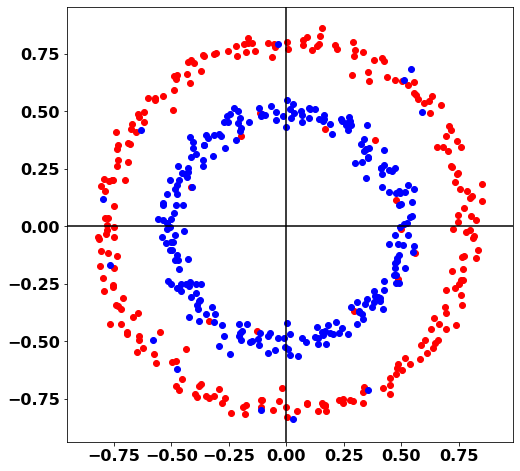

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.axis('equal')
plt.show()

In [11]:
def PlotSVM(sigma):
    SvmClassifier = SVC(kernel='rbf', gamma=1/sigma**2).fit(mX, vY)
    v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
    v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
    XX0, XX1 = np.meshgrid(v0, v1)
    XX       = np.c_[XX0.ravel(), XX1.ravel()]

    plt.figure(figsize=(10,10))
    Z = SvmClassifier.predict(XX)
    Z = Z.reshape(XX0.shape)

    plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
    plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
    plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')
    plt.title('$\sigma = ' + str(sigma) + '$')
    plt.show()

In [13]:
sigmaSlider = FloatSlider(min=0.01, max=10, step=0.01, value=1, layout=Layout(width='80%'))
interact(PlotSVM, sigma=sigmaSlider)

interactive(children=(FloatSlider(value=1.0, description='sigma', layout=Layout(width='80%'), max=10.0, min=0.…

<function __main__.PlotSVM(sigma)>

### MARK
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)